In [1]:
# Import required libraries
from handlers.files_handler import FilesHandler
from helpers.tools import Tools
from parsers.http_parser import HttpParser
from copy import deepcopy
from cluster.cluster import CustomCluster
from typing import Tuple, List, Dict

In [2]:
# Open data, prepare HTTP parser rules and process input data
raw_results = FilesHandler().open_results()
http_parser = HttpParser(process_cookie=True,
                         process_trash_headers=True,
                         remove_digits=False,
                         remove_special=False)
prepared_results = Tools.process_data(deepcopy(raw_results), http_parser)

Calculate results for 1 clusters
Calculate results for 2 clusters
Calculate results for 3 clusters
Calculate results for 4 clusters
Calculate results for 5 clusters
Calculate results for 6 clusters
Calculate results for 7 clusters
Calculate results for 8 clusters
Calculate results for 9 clusters


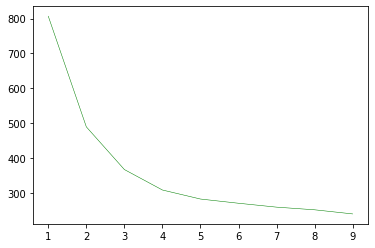

In [3]:
# Create our Cluster object, determine the quantity of clusters
cluster = CustomCluster(prepared_results)
cluster.prepare_matrix()
cluster.determine_k()

In [4]:
# Use value from determine_k plot here. You need the Elbow of your plot
cluster.make_cluster(clusters_q=3)

Current cluster: 0
['kbn', 'cache', 'content', 'accept', 'kibana', 'version', 'encoding', 'vary', 'alive', 'bytes', 'ranges', 'control', 'type', 'random_value_contentlength', '200', 'ok', 'text', 'random_value_date', 'date', 'charset']
Current cluster: 1
['envoy', 'time', 'service', 'upstream', 'express', 'powered', 'istio', 'public', 'etag', 'random_value_lastmodified', 'random_value_etag', 'modified', 'age', 'max', 'content', 'server', 'charset', 'utf', 'ranges', 'bytes']
Current cluster: 2
['random_value_expires', 'expires', '43200', 'gunicorn', 'close', 'etag', 'random_value_etag', 'modified', 'random_value_lastmodified', 'public', 'max', 'age', 'content', 'server', '20', '19', 'charset', 'utf', 'control', 'cache']


In [5]:
# Show some results of clustering
samples_per_class = Tools.get_random_samples_from_results(raw_results)

print(" ---\nExamples\n ---")
for class_name, class_data in samples_per_class:

    class_data = http_parser.process_headers(class_data)
    if not class_data:
        continue

    print(class_name, cluster.predict(class_data), "\t - \t", repr(class_data))

 ---
Examples
 ---
kibana content-length: 217 [0] 	 - 	 'HTTP/1.1 200 OK kbn-name: kibana kbn-version: 5.6.4 kbn-xpack-sig: 49902605a5a4230016d29708a111cb38 cache-control: no-cache content-type: text/html; charset=utf-8 content-length: random_value_contentlength accept-ranges: bytes vary: accept-encoding Date: random_value_date Connection: keep-alive'
kibana content-length: 217 [0] 	 - 	 'HTTP/1.1 200 OK kbn-name: kibana kbn-xpack-sig: cdb406043ca1d4b272b13d4a4479483a cache-control: no-cache content-type: text/html; charset=utf-8 content-length: random_value_contentlength accept-ranges: bytes vary: accept-encoding Date: random_value_date Connection: keep-alive'
kibana content-length: 217 [0] 	 - 	 'HTTP/1.1 200 OK kbn-name: kibana kbn-version: 5.6.16 cache-control: no-cache content-type: text/html; charset=utf-8 content-length: random_value_contentlength accept-ranges: bytes vary: accept-encoding Date: random_value_date Connection: keep-alive'
kibana content-length: 217 [0] 	 - 	 'HTTP